In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract

In [2]:
# Import datasets
meteorites = pd.read_csv("https://drive.google.com/file/d/1egSv0xRq7hNw9W08br0u4Zdx-7F9sRZf/view?usp=share_link")
ufos = pd.read_csv("https://drive.google.com/file/d/1rrZJPgan0YCH-W0S8acoJI4iWqfPkgtr/view?usp=share_link")

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore

Based on this initial exploration of the datasets I noticed that the datatype of the 'latitude' column in the ufo sightings dataset was object rather than float64. I also noticed, that the 'reclat' and 'reclong' columns of the meteorite landings dataset had an equal number of NaN values that will eventually need to be dropped. 

In [3]:
# First five rows of the raw data
print(meteorites.head())
print(ufos.head())

       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  States  Counties  
0    6.08333     (50.775, 6.08333)     NaN       NaN  
1   10.23333  (56.18333, 10.23333)     NaN       NaN  
2 -113.00000    (54.21667, -113.0)     NaN       NaN  
3  -99.90000     (16.88333, -99.9)     NaN       NaN  
4  -64.95000   (-33.16667, -64.95)     NaN       NaN  
          Date_time                  city state/province country UFO_shape  \
0  10/10/1949 20:30            san marcos             tx      us  cylinder   
1  10/10/1949 21:00          lackland afb             tx 

In [4]:
# Summary statistics
print(meteorites.describe())
print(ufos.describe())

                 id      mass (g)          year        reclat       reclong  \
count  45716.000000  4.558500e+04  45425.000000  38401.000000  38401.000000   
mean   26889.735104  1.327808e+04   1991.828817    -39.122580     61.074319   
std    16860.683030  5.749889e+05     25.052766     46.378511     80.647298   
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330   
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000   
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670   
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670   
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330   

            States     Counties  
count  1659.000000  1659.000000  
mean     17.337553  1353.331525  
std      10.410888   994.089259  
min       1.000000     5.000000  
25%       9.000000   482.000000  
50%      15.000000  1195.000000  
75%      23.000000  2113.000000  
max      51.0000

In [5]:
# Dimensions of the dataframes
print(meteorites.shape)
print(ufos.shape)

(45716, 12)
(80332, 11)


In [6]:
# Columns' names
print(meteorites.columns)
print(ufos.columns)

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation', 'States', 'Counties'],
      dtype='object')
Index(['Date_time', 'city', 'state/province', 'country', 'UFO_shape',
       'length_of_encounter_seconds', 'described_duration_of_encounter',
       'description', 'date_documented', 'latitude', 'longitude'],
      dtype='object')


In [7]:
# Datatypes of the columns
print(meteorites.dtypes)
print(ufos.dtypes)

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
States         float64
Counties       float64
dtype: object
Date_time                           object
city                                object
state/province                      object
country                             object
UFO_shape                           object
length_of_encounter_seconds         object
described_duration_of_encounter     object
description                         object
date_documented                     object
latitude                            object
longitude                          float64
dtype: object


In [8]:
# Number of NaN values in the dataframes
print(meteorites.isna().sum())
print(ufos.isna().sum())

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
States         44057
Counties       44057
dtype: int64
Date_time                             0
city                                  0
state/province                     5797
country                            9670
UFO_shape                          1932
length_of_encounter_seconds           0
described_duration_of_encounter       0
description                          15
date_documented                       0
latitude                              0
longitude                             0
dtype: int64


# Transform

## Clean

In [9]:
# Create unique identifier for each ufo sighting
ufos['id'] = ufos.index

In [10]:
# Remove unnecessary columns
ufos_by_location = ufos[['id', 'latitude', 'longitude']]
meteorites_by_location = meteorites[['id', 'reclat', 'reclong']]

In [11]:
# Convert object types to float64 and drop the row that contains a value that could not be converted
ufos_by_location['latitude'] = pd.to_numeric(ufos_by_location['latitude'], errors='coerce')
ufos_by_location = ufos_by_location.dropna()

<ipython-input-11-80efafa60b6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufos_by_location['latitude'] = pd.to_numeric(ufos_by_location['latitude'], errors='coerce')


In [12]:
# Drop all NaN values
meteorites_by_location = meteorites_by_location.dropna()

In [13]:
# Drop duplicate entries
ufos_by_location = ufos_by_location.drop_duplicates()

In [14]:
# Categorize each entry as either meteorite or ufo to make calculations easier
meteorites_by_location['type'] = 1
ufos_by_location['type'] = 0

In [15]:
# Combine the meteorite landings locations and ufo sightings locations into one table
meteorites_by_location.columns = ['meteorite_id', 'latitude', 'longitude', 'type']
ufos_by_location.columns = ['ufo_id', 'latitude', 'longitude', 'type']
meteorites_and_ufos_by_location = pd.concat([meteorites_by_location, ufos_by_location], axis=0)
meteorites_and_ufos_by_location.head()

,meteorite_id,latitude,longitude,type,ufo_id
0,1.0,50.77500,6.08333,1,NaN
1,2.0,56.18333,10.23333,1,NaN
2,6.0,54.21667,-113.00000,1,NaN
3,10.0,16.88333,-99.90000,1,NaN
4,370.0,-33.16667,-64.95000,1,NaN


## Aggregate

In [16]:
# Employ k-means clustering to group meteorite landings and ufo sightings into regions 
# 50 was chosen as the number of clusters, so that theoretically each region was small enough for most individuals within a given region to witness the meteorite impact or ufo
kmeans = KMeans(n_clusters = 50, init ='k-means++')
kmeans.fit(meteorites_and_ufos_by_location[meteorites_and_ufos_by_location.columns[1:3]])
meteorites_and_ufos_by_location['region'] = kmeans.fit_predict(meteorites_and_ufos_by_location[meteorites_and_ufos_by_location.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(meteorites_and_ufos_by_location[meteorites_and_ufos_by_location.columns[1:3]])

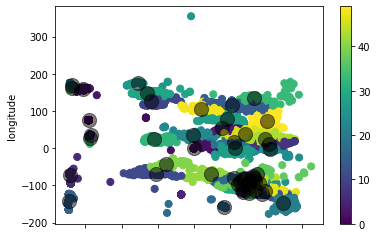

In [17]:
# Visualization of the results of the k-means clustering
meteorites_and_ufos_by_location.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

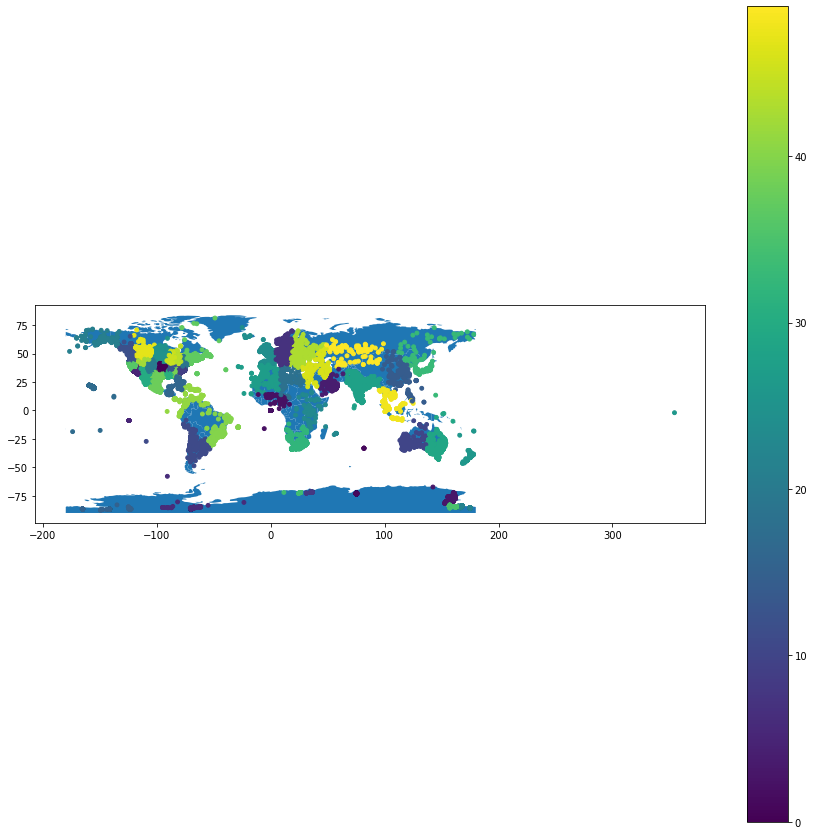

In [18]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# Convert latitude and longitude and turn pandas dataframe into geopandas dataframe
geometry = [Point(xy) for xy in zip(meteorites_and_ufos_by_location['longitude'], meteorites_and_ufos_by_location['latitude'])]
gdf = GeoDataFrame(meteorites_and_ufos_by_location, geometry=geometry)

# Plot ufo sightings and meteorite landings on world map and color by region
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', column='region', cmap='viridis', markersize=15, legend=True);

## Normalize

In [19]:
# Create a table that contains each ufo sighting along with their latitude, longitude, and region present in the database
ufos_by_location = ufos_by_location.merge(meteorites_and_ufos_by_location[['ufo_id', 'region']], on='ufo_id', how="left")
ufos_by_location = ufos_by_location.drop('type', axis=1)
ufos_by_location = ufos_by_location[['ufo_id', 'region', 'latitude', 'longitude']]
ufos_by_location.head()

,ufo_id,region,latitude,longitude
0,0,38,29.883056,-97.941111
1,1,38,29.384210,-98.581082
2,2,24,53.200000,-2.916667
3,3,38,28.978333,-96.645833
4,4,17,21.418056,-157.803611


In [20]:
# Create a table that contains each meteorite landing along with their latitude, longitude, and region present in the database
meteorites_by_location = meteorites_by_location.merge(meteorites_and_ufos_by_location[['meteorite_id', 'region']], on='meteorite_id', how="left")
meteorites_by_location = meteorites_by_location.drop('type', axis=1)
meteorites_by_location = meteorites_by_location[['meteorite_id', 'region', 'latitude', 'longitude']]
meteorites_by_location.head()

,meteorite_id,region,latitude,longitude
0,1,7,50.77500,6.08333
1,2,7,56.18333,10.23333
2,6,47,54.21667,-113.00000
3,10,38,16.88333,-99.90000
4,370,11,-33.16667,-64.95000


In [21]:
# Create a table that contains other non-location based potentially relevant information about each ufo sighting present in the database
ufo_sightings = ufos_by_location.merge(ufos[['id', 'Date_time', 'UFO_shape', 'description']], left_on='ufo_id', right_on='id', how="left")
ufo_sightings = ufo_sightings[['ufo_id', 'region', 'Date_time', 'UFO_shape', 'description']]
ufo_sightings.head()

,ufo_id,region,Date_time,UFO_shape,description
0,0,38,10/10/1949 20:30,cylinder,This event took place in early fall around 194...
1,1,38,10/10/1949 21:00,light,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,24,10/10/1955 17:00,circle,Green/Orange circular disc over Chester&#44 En...
3,3,38,10/10/1956 21:00,circle,My older brother and twin sister were leaving ...
4,4,17,10/10/1960 20:00,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [22]:
# Check to ensure dataframes were joined correctly
# Chose not to drop NaN values due to the fact that relevant information such as Date_time is present for each entry
print(ufo_sightings.isna().sum())

ufo_id            0
region            0
Date_time         0
UFO_shape      1932
description      15
dtype: int64


In [23]:
# Create a table that contains other non-location based potentially relevant information about each meteorite landing present in the database
meteorite_landings = meteorites_by_location.merge(meteorites[['id', 'name', 'mass (g)', 'year']], left_on='meteorite_id', right_on='id', how="left")
meteorite_landings = meteorite_landings[['meteorite_id', 'region', 'name', 'year', 'mass (g)']]
meteorite_landings.head()

,meteorite_id,region,name,year,mass (g)
0,1,7,Aachen,1880.0,21.0
1,2,7,Aarhus,1951.0,720.0
2,6,47,Abee,1952.0,107000.0
3,10,38,Acapulco,1976.0,1914.0
4,370,11,Achiras,1902.0,780.0


In [24]:
# Check to ensure dataframes were joined correctly
print(meteorite_landings.isna().sum())

meteorite_id      0
region            0
name              0
year            178
mass (g)        119
dtype: int64


In [25]:
# Create a table that contains both the number of meteorite landings and ufo sightings by region by grouping by region and aggregating the count and sum of type
meteorites_and_ufos_by_location = meteorites_and_ufos_by_location.groupby(['region']).agg({'type': ['count', 'sum']})

In [26]:
# Calculate number of ufo sightings, appropriately rename columns, and drop unnecessary count column
meteorites_and_ufos_by_location['ufo_sightings'] = meteorites_and_ufos_by_location[('type', 'count')] - meteorites_and_ufos_by_location[('type', 'sum')]
meteorites_and_ufos_by_location.columns = ['count', 'meteorite_landings', 'ufo_sightings']
meteorites_and_ufos_by_location = meteorites_and_ufos_by_location.drop('count', axis=1)
meteorites_and_ufos_by_location = meteorites_and_ufos_by_location.reset_index()
meteorites_and_ufos_by_location.head()

,region,meteorite_landings,ufo_sightings
0,0,154,3259
1,1,2494,5
2,2,6251,10
3,3,6078,0
4,4,3157,42


# Load

In [27]:
# Connect to AWS RDS host
import psycopg2
def get_conn_cur():
 
 conn = psycopg2.connect(
    host="hw-db.csjfcyw23nqt.us-west-2.rds.amazonaws.com",
    database="hw3_db",
    user="postgres",
    password="password",
    port='5432'
    )
 
 cur = conn.cursor()
 return(conn, cur)

In [28]:
# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
 conn, cur = get_conn_cur() # get connection and cursor

 # query to get table names
 table_name_query = """SELECT table_name FROM information_schema.tables """

 cur.execute(table_name_query) # execute
 my_data = cur.fetchall() # fetch results

 cur.close() #close cursor
 conn.close() # close connection

 return(my_data) # return your fetched results
 
# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

## meteorites_and_ufos_by_location table

In [29]:
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE meteorites_and_ufos_by_location (
     region_id BIGINT PRIMARY KEY,
     meteorite_landings BIGINT NOT NULL, 
     ufo_sightings BIGINT NOT NULL
     );"""
tq2 = """DROP TABLE meteorites_and_ufos_by_location;"""
cur.execute(tq)
conn.commit()
cur.close()
conn.close()

In [30]:
# Check table was created correctly
get_column_names(table_name='meteorites_and_ufos_by_location')

[('region_id',), ('meteorite_landings',), ('ufo_sightings',)]

In [31]:
# Convert types for numpy array vectorization
meteorites_and_ufos_by_location['region'] = meteorites_and_ufos_by_location['region'].values.astype(float)
meteorites_and_ufos_by_location['meteorite_landings'] = meteorites_and_ufos_by_location['meteorite_landings'].values.astype(float)
meteorites_and_ufos_by_location['ufo_sightings'] = meteorites_and_ufos_by_location['ufo_sightings'].values.astype(float)


In [32]:
# Convert pandas dataframe to numpy array and vectorize
import numpy as np

meteorites_and_ufos_by_location_np = meteorites_and_ufos_by_location.to_numpy();
meteorites_and_ufos_by_location_np[:,1] = np.vectorize(lambda x: str(x))(meteorites_and_ufos_by_location_np[:,1]) 
data_tups = [tuple(x) for x in meteorites_and_ufos_by_location_np]

In [33]:
# Upload data into table staged in AWS RDS database
iq = """INSERT INTO meteorites_and_ufos_by_location(region_id,meteorite_landings,ufo_sightings) VALUES(%s, %s, %s);"""
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()
conn.close()

In [34]:
# Check data was inserted correctly
sql_head(table_name='meteorites_and_ufos_by_location')

,region_id,meteorite_landings,ufo_sightings
0,0,154,3259
1,1,2494,5
2,2,6251,10
3,3,6078,0
4,4,3157,42


## ufos_by_location table

In [35]:
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE ufos_by_location (
     ufo_id BIGINT PRIMARY KEY,
     region_id BIGINT NOT NULL, 
     latitude FLOAT NOT NULL,
     longitude FLOAT NOT NULL,
     FOREIGN KEY (region_id) REFERENCES meteorites_and_ufos_by_location(region_id)
     );"""
tq2 = """DROP TABLE ufos_by_location;"""
cur.execute(tq)
conn.commit()
cur.close()
conn.close()

In [36]:
# Check table was created correctly
get_column_names(table_name='ufos_by_location')

[('ufo_id',), ('region_id',), ('latitude',), ('longitude',)]

In [38]:
# Convert types for numpy array vectorization
ufos_by_location['ufo_id'] = ufos_by_location['ufo_id'].values.astype(float)
ufos_by_location['region'] = ufos_by_location['region'].values.astype(float)

In [39]:
# Convert pandas dataframe to numpy array and vectorize
import numpy as np

ufos_by_location_np = ufos_by_location.to_numpy();
ufos_by_location_np[:,1] = np.vectorize(lambda x: str(x))(ufos_by_location_np[:,1]) 
data_tups = [tuple(x) for x in ufos_by_location_np]

In [40]:
# Upload data into table staged in AWS RDS database
iq = """INSERT INTO ufos_by_location(ufo_id,region_id,latitude,longitude) VALUES(%s, %s, %s, %s);"""
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()
conn.close()

In [41]:
# Check data was inserted correctly
sql_head(table_name='ufos_by_location')

,ufo_id,region_id,latitude,longitude
0,0,38,29.883056,-97.941111
1,1,38,29.384210,-98.581082
2,2,24,53.200000,-2.916667
3,3,38,28.978333,-96.645833
4,4,17,21.418056,-157.803611


## meteorites_by_location table

In [42]:
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE meteorites_by_location (
     meteorite_id BIGINT PRIMARY KEY,
     region_id BIGINT NOT NULL, 
     latitude FLOAT NOT NULL,
     longitude FLOAT NOT NULL,
     FOREIGN KEY (region_id) REFERENCES meteorites_and_ufos_by_location(region_id)
     );"""
tq2 = """DROP TABLE meteorites_by_location;"""
cur.execute(tq)
conn.commit()
cur.close()
conn.close()

In [43]:
# Check table was created correctly
get_column_names(table_name='meteorites_by_location')

[('meteorite_id',), ('region_id',), ('latitude',), ('longitude',)]

In [45]:
# Convert types for numpy array vectorization
meteorites_by_location['meteorite_id'] = meteorites_by_location['meteorite_id'].values.astype(float)

In [46]:
# Convert pandas dataframe to numpy array and vectorize
import numpy as np

meteorites_by_location_np = meteorites_by_location.to_numpy();
meteorites_by_location_np[:,1] = np.vectorize(lambda x: str(x))(meteorites_by_location_np[:,1]) 
data_tups = [tuple(x) for x in meteorites_by_location_np]

In [47]:
# Upload data into table staged in AWS RDS database
iq = """INSERT INTO meteorites_by_location(meteorite_id,region_id,latitude,longitude) VALUES(%s, %s, %s, %s);"""
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()
conn.close()

In [48]:
# Check data was inserted correctly
sql_head(table_name='meteorites_by_location')

,meteorite_id,region_id,latitude,longitude
0,1,7,50.77500,6.08333
1,2,7,56.18333,10.23333
2,6,47,54.21667,-113.00000
3,10,38,16.88333,-99.90000
4,370,11,-33.16667,-64.95000


## ufo_sightings table

In [49]:
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE ufo_sightings (
     ufo_id BIGINT PRIMARY KEY,
     region_id BIGINT NOT NULL, 
     date DATE NOT NULL,
     shape VARCHAR(255),
     description VARCHAR(255),
     FOREIGN KEY (region_id) REFERENCES meteorites_and_ufos_by_location(region_id)
     );"""
tq2 = """DROP TABLE ufo_sightings;"""
cur.execute(tq)
conn.commit()
cur.close()
conn.close()

In [50]:
# Check table was created correctly
get_column_names(table_name='ufo_sightings')

[('ufo_id',), ('region_id',), ('date',), ('shape',), ('description',)]

In [52]:
# Convert types for numpy array vectorization
ufo_sightings['ufo_id'] = ufo_sightings['ufo_id'].values.astype(float)

In [53]:
# Convert pandas dataframe to numpy array and vectorize
import numpy as np

ufo_sightings_np = ufo_sightings.to_numpy();
ufo_sightings_np[:,1] = np.vectorize(lambda x: str(x))(ufo_sightings_np[:,1]) 
data_tups = [tuple(x) for x in ufo_sightings_np]

In [54]:
# Upload data into table staged in AWS RDS database
iq = """INSERT INTO ufo_sightings(ufo_id,region_id,date,shape,description) VALUES(%s, %s, %s, %s, %s);"""
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()
conn.close()

In [55]:
# Check data was inserted correctly
sql_head(table_name='ufo_sightings')

,ufo_id,region_id,date,shape,description
0,0,38,1949-10-10,cylinder,This event took place in early fall around 194...
1,1,38,1949-10-10,light,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,24,1955-10-10,circle,Green/Orange circular disc over Chester&#44 En...
3,3,38,1956-10-10,circle,My older brother and twin sister were leaving ...
4,4,17,1960-10-10,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...


## meteorite_landings table

In [56]:
conn, cur = get_conn_cur()
cur = conn.cursor()
tq = """CREATE TABLE meteorite_landings (
     meteorite_id BIGINT PRIMARY KEY,
     region_id BIGINT NOT NULL, 
     name VARCHAR(255) NOT NULL,
     year BIGINT NOT NULL,
     mass FLOAT NOT NULL,
     FOREIGN KEY (region_id) REFERENCES meteorites_and_ufos_by_location(region_id)
     );"""
tq2 = """DROP TABLE meteorite_landings;"""
cur.execute(tq)
conn.commit()
cur.close()
conn.close()

In [57]:
# Check table was created correctly
get_column_names(table_name='meteorite_landings')

[('meteorite_id',), ('region_id',), ('name',), ('year',), ('mass',)]

In [59]:
# Convert types for numpy array vectorization
meteorite_landings['meteorite_id'] = meteorite_landings['meteorite_id'].values.astype(float)
meteorite_landings['year'] = meteorite_landings['year'].values.astype(int)

In [60]:
# Convert pandas dataframe to numpy array and vectorize
import numpy as np

meteorite_landings_np = meteorite_landings.to_numpy();
meteorite_landings_np[:,1] = np.vectorize(lambda x: str(x))(meteorite_landings_np[:,1]) 
data_tups = [tuple(x) for x in meteorite_landings_np]

In [61]:
# Upload data into table staged in AWS RDS database
iq = """INSERT INTO meteorite_landings(meteorite_id,region_id,name,year,mass) VALUES(%s, %s, %s, %s, %s);"""
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()
conn.close()

In [62]:
# Check data was inserted correctly
sql_head(table_name='meteorite_landings')

,meteorite_id,region_id,name,year,mass
0,1,7,Aachen,1880,21.0
1,2,7,Aarhus,1951,720.0
2,6,47,Abee,1952,107000.0
3,10,38,Acapulco,1976,1914.0
4,370,11,Achiras,1902,780.0


## Example Queries

In [72]:
# Regions with meteorite landings and UFO sightings greater than or equal to 100
qs = """ SELECT * FROM meteorites_and_ufos_by_location
            WHERE meteorite_landings >= 100 AND ufo_sightings >= 100
            LIMIT 20;"""
run_query(qs)

(['region_id', 'meteorite_landings', 'ufo_sightings'],
 [(0, 154, 3259),
  (5, 254, 6133),
  (7, 249, 481),
  (10, 507, 107),
  (20, 526, 2548),
  (24, 101, 2561),
  (28, 162, 300),
  (29, 138, 529),
  (30, 157, 3041),
  (38, 256, 3704),
  (43, 154, 239)])

In [73]:
# Latitude and longitude of all UFO sightings in regions with meteorite landings and UFO sightings greater than or equal to 100
qs = """ SELECT latitude, longitude FROM ufos_by_location
            WHERE region_id IN (SELECT region_id FROM meteorites_and_ufos_by_location WHERE meteorite_landings >= 100 AND ufo_sightings >= 100)
            LIMIT 20;"""
run_query(qs)

(['latitude', 'longitude'],
 [(29.883055600000006, -97.94111109999999),
  (29.384209999999996, -98.581082),
  (53.2, -2.916667),
  (28.9783333, -96.64583329999999),
  (51.434722, -3.18),
  (33.916388899999994, -118.35166670000001),
  (51.5, -3.2),
  (38.1055556, -98.6597222),
  (51.783333, -0.783333),
  (29.423888899999998, -98.4933333),
  (32.7152778, -117.1563889),
  (38.7583333, -104.7425),
  (29.763055600000005, -95.3630556),
  (32.783333299999995, -96.8),
  (29.763055600000005, -95.3630556),
  (53.8, -1.583333),
  (40.015, -105.27),
  (34.1577778, -118.6375),
  (29.6158333, -95.5575),
  (32.7591667, -97.7969444)])

In [74]:
# Latitude and longitude of all meteorite landings in regions with meteorite landings and UFO sightings greater than or equal to 100
qs = """ SELECT latitude, longitude FROM meteorites_by_location
            WHERE region_id IN (SELECT region_id FROM meteorites_and_ufos_by_location WHERE meteorite_landings >= 100 AND ufo_sightings >= 100)
            LIMIT 20;"""
run_query(qs)

(['latitude', 'longitude'],
 [(50.775, 6.08333),
  (56.183330000000005, 10.23333),
  (16.883329999999997, -99.9),
  (32.1, 71.8),
  (44.21667, 0.6166699999999999),
  (50.66667, 2.33333),
  (29.71667, 77.95),
  (44.11667, 4.08333),
  (44.65, 11.01667),
  (45.821329999999996, 6.0153300000000005),
  (51.78333, -1.7833299999999999),
  (44.88333, 8.75),
  (50.95, 31.816670000000002),
  (45.26667, 10.15),
  (26.96667, -105.31667),
  (27.66667, 78.25),
  (26.58333, 85.56667),
  (48.7, 37.5),
  (20.883329999999997, 76.86667),
  (47.46667, -0.55)])

In [93]:
# Shape and description of UFO sightings by region
qs = """ SELECT ufo_id, region_id, shape, description FROM ufo_sightings
           GROUP BY region_id, ufo_id
           ORDER BY region_id ASC
           LIMIT 20;"""
run_query(qs)

(['ufo_id', 'region_id', 'shape', 'description'],
 [(378,
   0,
   'oval',
   'The first object was shaped like an oval and appeared coming out the southwest traveling in an eastern direction this object appeared t'),
  (490,
   0,
   'disk',
   'October&#44 1961&#44 Tulsa Oklahoma: low altitude&#44 slow&#44 disk object(s); high speed turns&#44 v. high accelleration.'),
  (318,
   0,
   'light',
   'Bright light due south&#44 traveling east extremely slowly. Bright flash given off from object every 10 seconds&#44 with a dim flash every 3'),
  (363,
   0,
   'circle',
   'Round light appeared to be surrounded by fog&#44 approaced from south neaded NNE&#44 changed speed&#44 then turned sharply west.'),
  (459,
   0,
   'unknown',
   'Silent blue and white lights of craft object change color&#44 approach myself and boyfriend&#44 before changing into buzzing&#44 everyday plane'),
  (481, 0, 'disk', '1952 daylight sighting of multiple discs in formation'),
  (159,
   0,
   'fireball',
   'E

In [92]:
# Name and mass of meteorite landings by region
qs = """ SELECT meteorite_id, region_id, name, mass FROM meteorite_landings
           GROUP BY region_id, meteorite_id
           ORDER BY region_id ASC
           LIMIT 20;"""
run_query(qs)

(['meteorite_id', 'region_id', 'name', 'mass'],
 [(4890, 0, 'Attica', 5622.0),
  (24333, 0, 'Woodward County', 45500.0),
  (24202, 0, 'Waldo', 1300.0),
  (22588, 0, 'Renfrow', 81600.0),
  (12463, 0, 'Lanton', 13780.0),
  (24256, 0, 'Wichita', 2367.0),
  (12028, 0, 'Independence', 880.0),
  (24280, 0, 'Wilmot', 2000.0),
  (10868, 0, 'Gaylord', 8480.0),
  (10862, 0, 'Garnett', 4788.0),
  (12755, 0, 'Leedey', 51500.0),
  (5287, 0, 'Cashion', 5896.8),
  (18063, 0, 'Oxford', 6000.0),
  (23649, 0, 'Smith Center', 1585.0),
  (54859, 0, 'Corn', 5176.0),
  (45966, 0, 'Kackley', 1368.0),
  (5454, 0, 'Cotesfield', 1160.0),
  (2331, 0, 'Argonia', 84.0),
  (11861, 0, 'Haviland (b)', 2092.0),
  (23158, 0, 'Sandy Creek', 1330.0)])

In [100]:
# All descriptions of UFO sightings containing the words asteroid, comet, and meteorite
qs = """ SELECT * FROM ufo_sightings
            WHERE description LIKE '%asteroid%' OR description LIKE '%comet%' OR description LIKE '%meteorite%'
            LIMIT 20;"""
run_query(qs)

(['ufo_id', 'region_id', 'date', 'shape', 'description'],
 [(314,
   36,
   datetime.date(1999, 10, 11),
   'cigar',
   'oblong&#44 extremely large and  bright object in sky&#44 going behind mountains. Object much larger than a meteorite.'),
  (703,
   12,
   datetime.date(2002, 10, 1),
   'teardrop',
   'Initially a comet in appearance&#44 but speed was too slow.'),
  (715,
   30,
   datetime.date(2002, 10, 1),
   'fireball',
   'In October 2002&#44 I was driving east on Interestate 40 (close to mile marker 100)&#44  when I saw a greenish &quot;comet-like&quot; shape movng very'),
  (839,
   20,
   datetime.date(2006, 10, 1),
   'circle',
   'I was standing on my deck facing east when I saw orange objects fly from north to south. They appeared to maybe be comets but I cannot'),
  (1026,
   19,
   datetime.date(1999, 10, 12),
   'fireball',
   'I saw a white object shoot across the sky at about 50-100 feet high. Looked like a comet&#44 but was way to close to the ground and was tr'),
 